In [1]:
# Install libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import emot

In [2]:
# Load the dataset
df = pd.read_csv('../data/reddit_raw.csv')  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  104 non-null    object
 1   title      104 non-null    object
 2   text       104 non-null    object
 3   url        104 non-null    object
 4   created    104 non-null    object
 5   keyword    104 non-null    object
 6   score      104 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [4]:
df.head()

,subreddit,title,text,url,created,keyword,score
0,ukraine,Volunteering in civilian roles,"Hi,\n\nI’m an American. When the war broke out...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,230
3,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,125
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,13


In [5]:
df['subreddit'].value_counts()

subreddit
ukraine            50
IsraelPalestine    50
politics            3
geopolitics         1
Name: count, dtype: int64

In [6]:
df.drop(df[df['subreddit'].isin(['politics', 'geopolitics'])].index, inplace =True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  100 non-null    object
 1   title      100 non-null    object
 2   text       100 non-null    object
 3   url        100 non-null    object
 4   created    100 non-null    object
 5   keyword    100 non-null    object
 6   score      100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.2+ KB


In [8]:
# Example for specific subreddit
df[df['subreddit']=='IsraelPalestine'].head()  

,subreddit,title,text,url,created,keyword,score
54,IsraelPalestine,The Pro-Palestine movement is slowly proving i...,**Important to note:**\n\n \n**I sympathize w...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-07-24 08:31:16,migrant,47
55,IsraelPalestine,At What Point Does Resistance Become Selfishness?,I was taking a look at some numbers of people ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-07-20 18:22:08,migrant,7
56,IsraelPalestine,Why do Islamic Totalitarian Theocracies get a ...,Just today Arab and Persian sources report on ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-30 00:55:36,migrant,57
57,IsraelPalestine,Myth: Israel Population Mostly Holocaust Refugees,I find the following numbers factual and persu...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-18 20:49:56,migrant,73
58,IsraelPalestine,If the IDF touches Greta thunberg it’s over….,Ya know the other day I was looking into this ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-04 19:13:57,migrant,24


In [9]:
# Example for specific subreddit
df[df['subreddit']=='ukraine'].head()  

,subreddit,title,text,url,created,keyword,score
0,ukraine,Volunteering in civilian roles,"Hi,\n\nI’m an American. When the war broke out...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,230
3,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,125
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,13


In [10]:
# Check the distribution of scores
df['score'].value_counts() 

score
6      5
14     4
30     4
19     4
8      3
      ..
132    1
202    1
112    1
161    1
23     1
Name: count, Length: 67, dtype: int64

In [11]:
df['keyword'].value_counts()

keyword
refugee                               55
refugees fleeing Russian invasion      9
internal displacement Ukraine          8
migrant                                7
border crossing                        6
eastern Ukraine                        6
immigrantUkrainian refugee             3
migration                              2
refugee in Europe                      2
asylum seeker                          1
Ukrainian war migrantGaza refugees     1
Name: count, dtype: int64

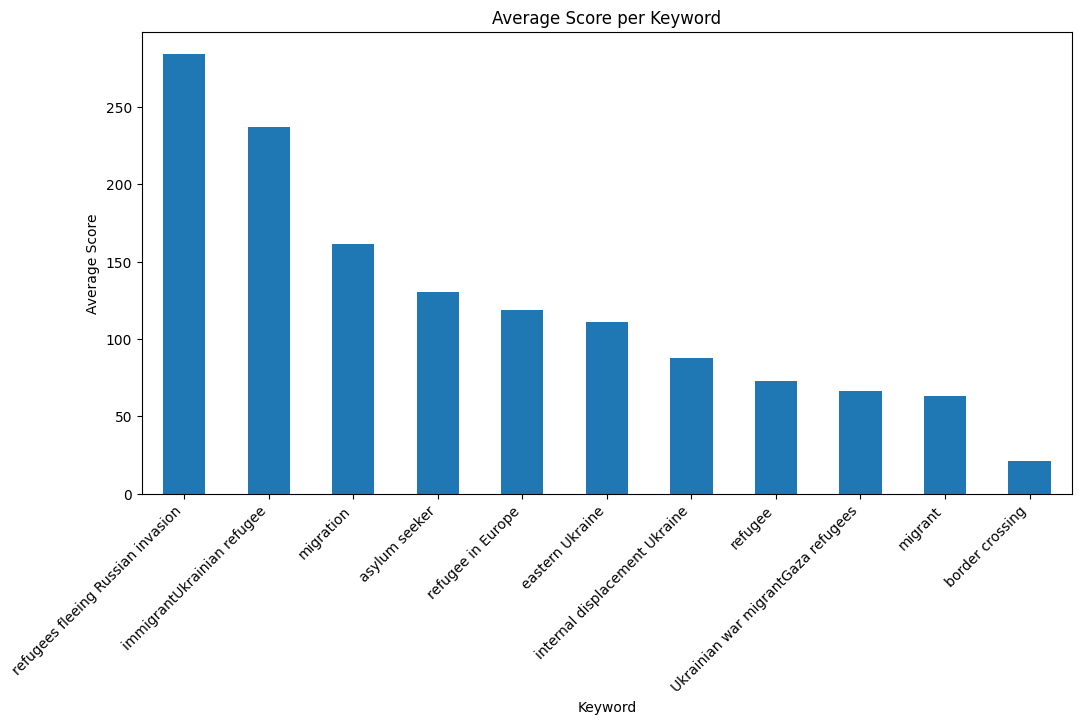

In [12]:
# Q: which keywords are most associated with higher/lower scores?
# compute average score per keyword
avg_scores = df.groupby("keyword")["score"].mean().sort_values(ascending=False)

avg_scores.plot(kind="bar", figsize=(12,6))
plt.title("Average Score per Keyword")
plt.ylabel("Average Score")
plt.xlabel("Keyword")
plt.xticks(rotation=45, ha="right")
plt.show()

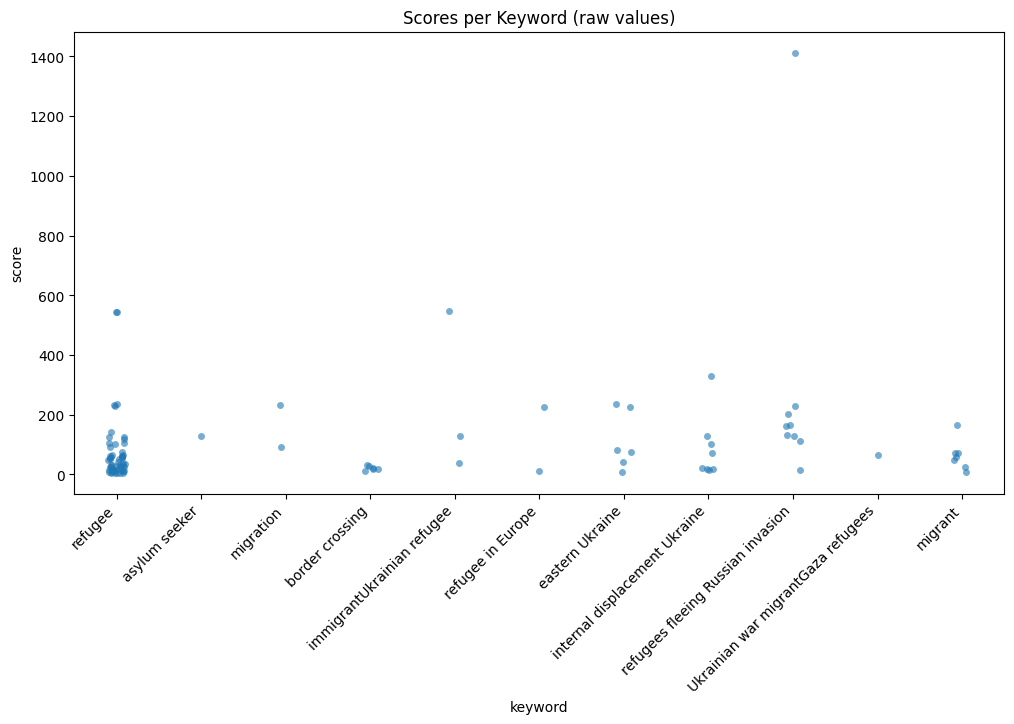

In [13]:
plt.figure(figsize=(12,6))
sns.stripplot(x="keyword", y="score", data=df, jitter=True, alpha=0.6)
plt.xticks(rotation=45, ha="right")
plt.title("Scores per Keyword (raw values)")
plt.show()

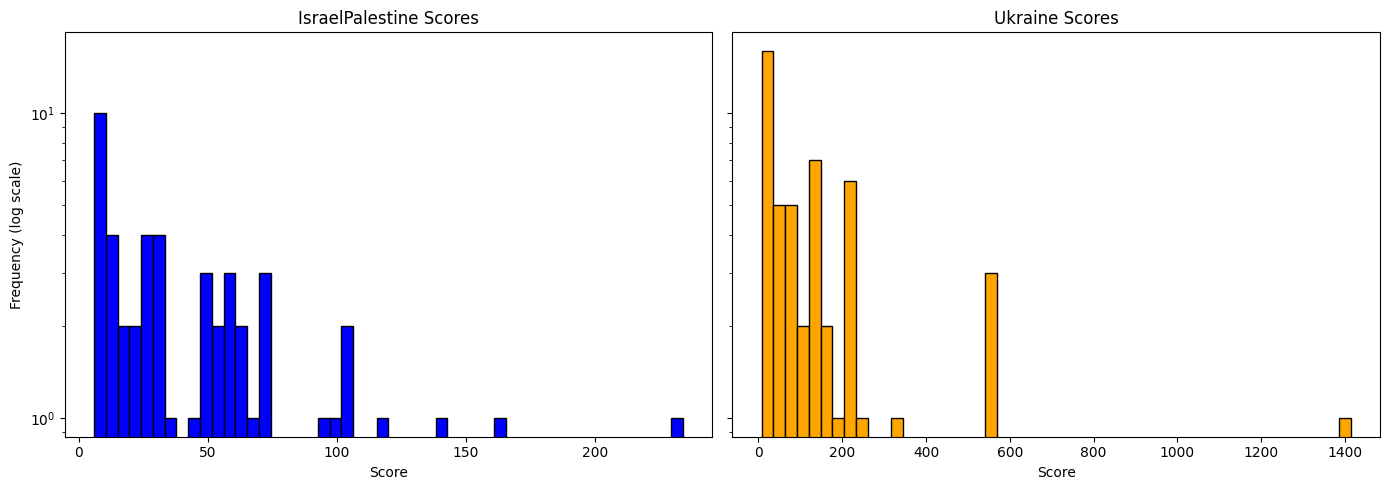

In [14]:
# Plotting the score distribution for two subreddits side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
scores_israel = df[df['subreddit'] == 'IsraelPalestine']['score']
scores_ukraine = df[df['subreddit'] == 'ukraine']['score']
axes[0].hist(scores_israel, bins=50, color='blue', edgecolor='black', log=True)
axes[0].set_title('IsraelPalestine Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency (log scale)')

axes[1].hist(scores_ukraine, bins=50, color='orange', edgecolor='black', log=True)
axes[1].set_title('Ukraine Scores')
axes[1].set_xlabel('Score')

plt.tight_layout()
plt.show()


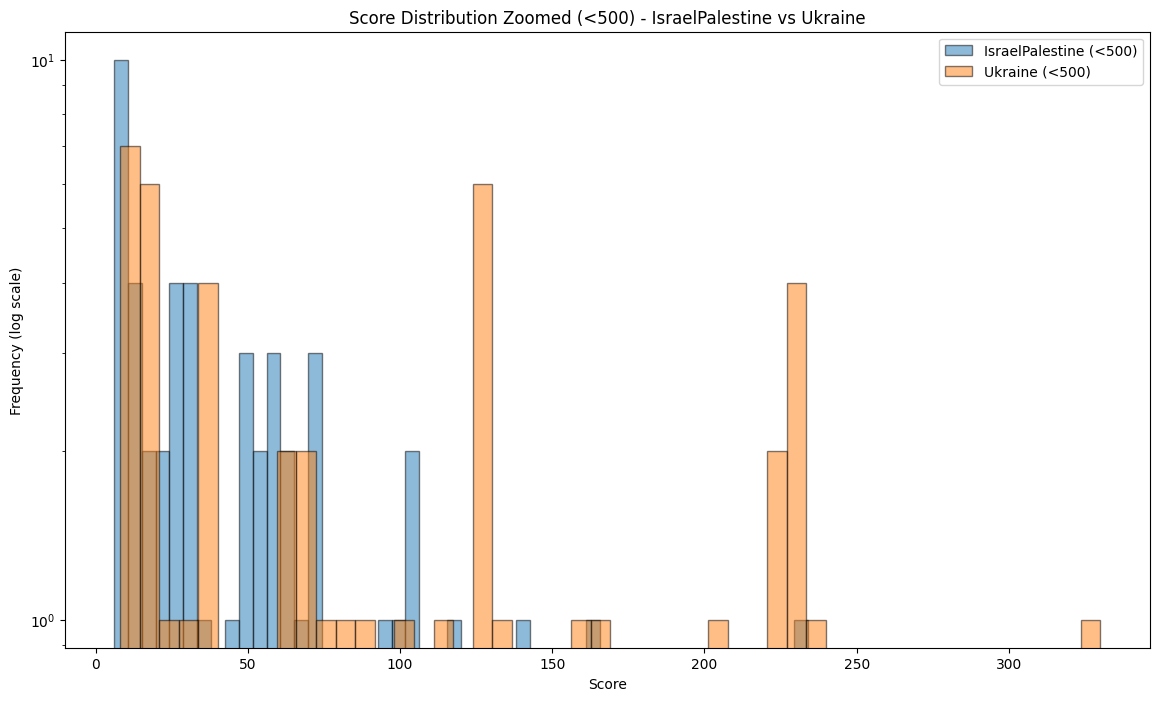

In [15]:
# Plotting the overlapped score distribution zoomed in for scores less than 500 
plt.figure(figsize=(14, 8))

plt.hist(scores_israel[scores_israel < 500], bins=50, alpha=0.5, label='IsraelPalestine (<500)', edgecolor='black', log=True)
plt.hist(scores_ukraine[scores_ukraine < 500], bins=50, alpha=0.5, label='Ukraine (<500)', edgecolor='black', log=True)

plt.title('Score Distribution Zoomed (<500) - IsraelPalestine vs Ukraine')
plt.xlabel('Score')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.show()


Interpretation & implications:

    r/IsraelPalestine appears to have many low-engagement or newly posted items, potentially with more recent or less popular content.

    r/ukraine shows a more varied and engaged set of posts, with more posts earning medium to high scores.

    This may reflect differences in subreddit size, activity, audience engagement, or post longevity.

    It suggests Ukraine discussions might generate broader engagement, while IsraelPalestine posts might be more niche or recently posted.

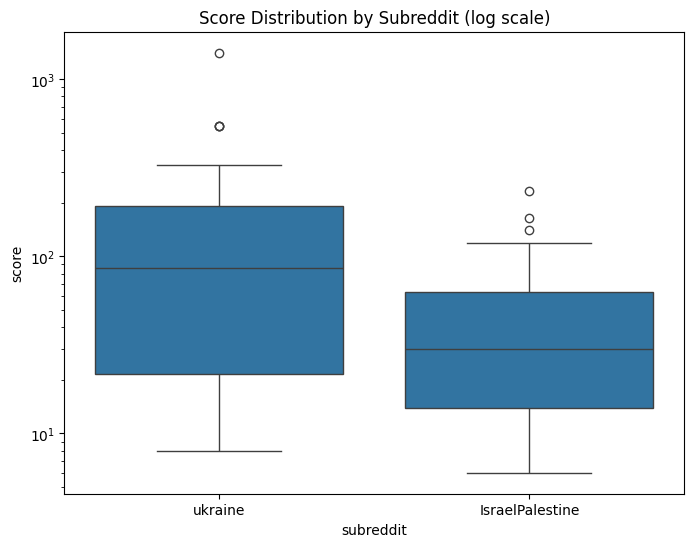

In [16]:
# Boxplot for score distribution by subreddit
plt.figure(figsize=(8, 6))
subset = df[df['subreddit'].isin(['IsraelPalestine', 'ukraine'])]
sns.boxplot(data=subset, x='subreddit', y='score')
plt.yscale('log')
plt.title('Score Distribution by Subreddit (log scale)')
plt.show()


In [17]:
df = df[df['subreddit'] != 'politics']
print(df['subreddit'].unique())

['ukraine' 'IsraelPalestine']


In [18]:
# Q: How did a specific subreddit (e.g., IsraelPalestine) perform in terms of score distribution over time?
# Convert to datetime
df['created_dt'] = pd.to_datetime(df['created'])

# Extract date only (e.g. daily granularity)
df['date'] = df['created_dt'].dt.date

<Figure size 1400x600 with 0 Axes>

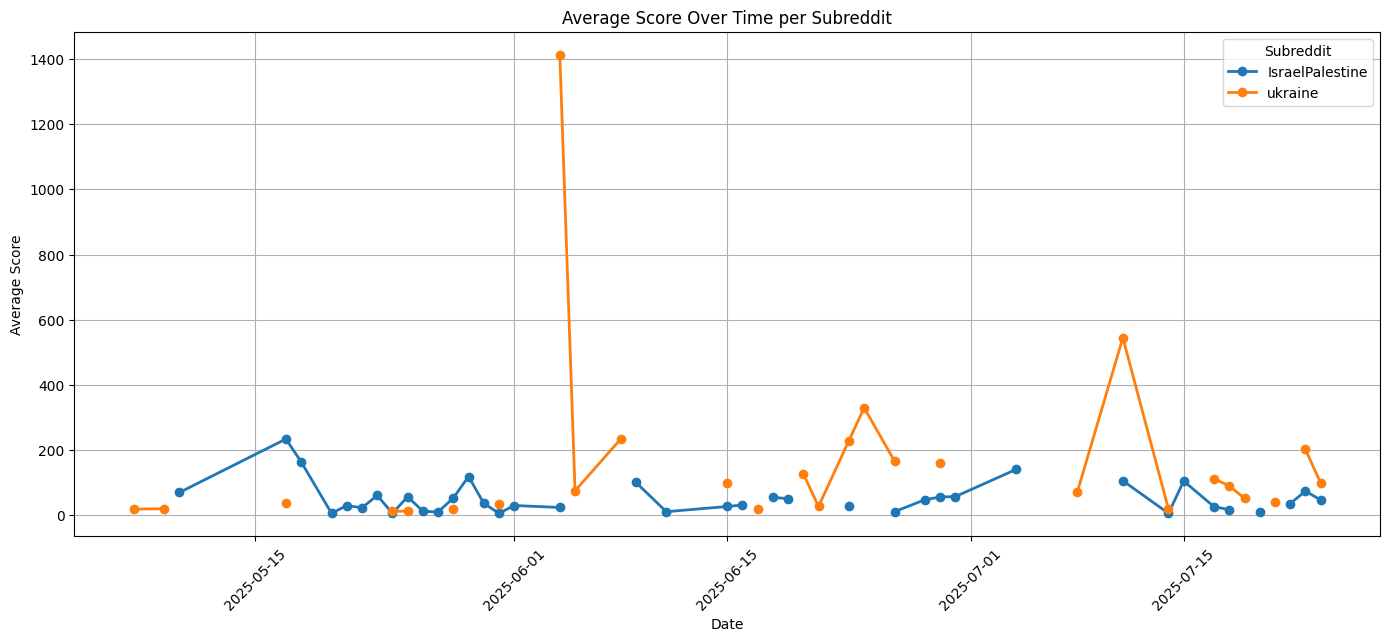

In [19]:
# Group by date and subreddit
score_by_date = df.groupby(['date', 'subreddit'])['score'].mean().reset_index()

# Pivot for plotting
score_pivot = score_by_date.pivot(index='date', columns='subreddit', values='score')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
score_pivot.plot(kind='line', marker='o', linewidth=2, figsize=(14, 6))

plt.title('Average Score Over Time per Subreddit')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.grid(True)
plt.legend(title='Subreddit')
plt.tight_layout()
plt.xticks(rotation=45) 
plt.show()

In [20]:
# Q: What's the post with the highest score in the 'ukraine' subreddit?
print(df.loc[df[df['subreddit'] == 'ukraine']['score'].idxmax()])

subreddit                                               ukraine
title                            What’s with the silence, West?
text          We all noticed Trump's clogged pipes after the...
url           https://www.reddit.com/r/ukraine/comments/1l30...
created                                     2025-06-04 10:12:58
keyword                       refugees fleeing Russian invasion
score                                                      1413
created_dt                                  2025-06-04 10:12:58
date                                                 2025-06-04
Name: 47, dtype: object


In [21]:
# Print the text of the post with the highest score in the 'Ukraine' subreddit
df.loc[df[df['subreddit'] == 'ukraine']['score'].idxmax(), 'text']

'We all noticed Trump\'s clogged pipes after the Ukrainian drone attack on Russian air bases and the destruction of nuclear bombers.\n\nAnd why is that? Why are we silent? Although he sang so much before, oh so much.\n\nWe also do not observe any great joy from the European partners. Well, there are a few responses from those who do not decide anything, such as Boris Johnson, but in general there is a deep strategic silence.\n\nIt would seem, why not be happy? You were all so afraid of Russian nuclear weapons - well, we have reduced the number of aircraft that can launch these nuclear weapons by about 41 pieces. Targeting you too btw.\n\nAnd judging by the unidentified explosions in the port of Severomosk, where Russian nuclear submarines are located, the time is not far when these clay legs of the nuclear Colossus will also buckle thanks to Ukrainian ingenuity.\n\nThe question is - why aren\'t you happy that Ukraine found a way to strike at the Russian nuclear greatness that you were 

In [22]:
# Q: What's the post with the highest score in the 'IsraelPalestine' subreddit?
print(df.loc[df[df['subreddit'] == 'IsraelPalestine']['score'].idxmax()])

subreddit                                       IsraelPalestine
title         The Jewish exodus from Arab/Muslim countries i...
text          \n\n\n(To my knowledge, none of the below-stat...
url           https://www.reddit.com/r/IsraelPalestine/comme...
created                                     2025-05-17 18:34:13
keyword                                                 refugee
score                                                       234
created_dt                                  2025-05-17 18:34:13
date                                                 2025-05-17
Name: 103, dtype: object


In [23]:
# Print the text of the post with the highest score in the 'IsraelPalestine' subreddit
df.loc[df[df['subreddit'] == 'IsraelPalestine']['score'].idxmax(), 'text']

"\n\n\n(To my knowledge, none of the below-stated facts are controversial. But I will be happy to be educated).\n\n\n\nA few points of comparison:\n\n\n\n**1.Absolute numbers:**\n\nRoughly 700,000 Palestinians fled or were expelled from Israel during the 1948 war.\n\nRoughly 1,000,000 Jews fled or were expelled from the Arab world plus Iran and Turkey in the decades that followed.\n\nAdditionally, between 30,000 to 90,000 Palestinian refugees managed to return to Israel before it could enforce effective border control. To my knowledge, few or no Jews ever returned to Arab/Muslim countries.\n\n**2. Relative numbers:**\n\nThe Palestinian population in Israel was reduced by around 80% because of the Palestinian Nakba.\n\nThe Jewish population in most Arab/Muslim countries was reduced by 99% or even 100%.\n\nThis is significant because there still exists a vibrant (if oppressed) Palestinian society inside Israel, while the Jewish communities throughout the Arab world (some of them ancient)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   subreddit   100 non-null    object        
 1   title       100 non-null    object        
 2   text        100 non-null    object        
 3   url         100 non-null    object        
 4   created     100 non-null    object        
 5   keyword     100 non-null    object        
 6   score       100 non-null    int64         
 7   created_dt  100 non-null    datetime64[ns]
 8   date        100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 11.9+ KB


In [25]:
df['text'].iloc[0:10]

0    Hi,\n\nI’m an American. When the war broke out...
1    As a Polish person I just came here to tell yo...
2    I found this useful for understanding my own b...
3    **Find your representatives here:** [**https:/...
4    Sorry for the vague question, but I only have ...
5    hello, \nI’m not Ukrainian but my friend is. I...
6    **Find your representatives here:** [**https:/...
7    Hello there! \n\nMy now wife and I moved to Iv...
8    I found this useful for understanding my own b...
9    Hi everyone,\n\nI’m planning a short trip from...
Name: text, dtype: object

In [26]:
import sys
sys.path.append('../src')
# Import feature engineering functions
from preprocess import clean_text

In [27]:
df['text'] = df['text'].apply(clean_text)

In [28]:
df['text'].iloc[0:10]

0    Hi, I’m an American. When the war broke out, I...
1    As a Polish person I just came here to tell yo...
2    I found this useful for understanding my own b...
3    Find your representatives here: Subject: Urgen...
4    Sorry for the vague question, but I only have ...
5    hello, I’m not Ukrainian but my friend is. I’m...
6    Find your representatives here: Subject: Urgen...
7    Hello there! My now wife and I moved to Ivano-...
8    I found this useful for understanding my own b...
9    Hi everyone, I’m planning a short trip from Ko...
Name: text, dtype: object

In [29]:
# Check for the presence of emoticons in the text and titles
import re

# Regex pattern for common emoticons (you can expand it)
emoticon_pattern = re.compile(
    r'(<3|:\)|:-\)|:\(|:-\(|:D|:-D|:P|;\)|;-\)|XD|:-\||:\|)'
)

def has_emoticon(text):
    return bool(emoticon_pattern.search(text))

def extract_emoticons(text):
    return emoticon_pattern.findall(text)

# Apply to your DataFrame
df['has_emoticon'] = df['title'].apply(has_emoticon)
df['emoticons_found'] = df['title'].apply(extract_emoticons)

# Show titles with emoticons and what was found
print(df.loc[df['has_emoticon'], ['text', 'emoticons_found']])


                                                 text emoticons_found
1   As a Polish person I just came here to tell yo...            [<3]
15  As a Polish person I just came here to tell yo...            [<3]
27  As a Polish person I just came here to tell yo...            [<3]


In [30]:
df.to_csv('../data/reddit_cleaned.csv', index=False)

<3 = ❤️ (love, care, appreciation)
It’s often used informally in Reddit titles or texts to express:

    Solidarity or compassion (e.g., "Support for Ukraine <3")

    Emotional tone (positive or sentimental)

    Endearment or emotional emphasis

EDA for ABSA by DeBERTa and Gemini

In [31]:
df_predicted = pd.read_csv('../data/reddit_predicted_sentiment.csv')
df_predicted.head(50)

,subreddit,title,text,url,created,keyword,score,created_dt,date,has_emoticon,emoticons_found,gemini_sentiment,gemini_confidence,deberta_sentiment,deberta_confidence
0,ukraine,Volunteering in civilian roles,"Hi, I’m an American. When the war broke out, I...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62,2025-07-19 14:54:55,2025-07-19,False,[],Neutral,0.95,positive,0.7304
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544,2025-07-11 21:03:10,2025-07-11,True,['<3'],Positive,0.95,negative,0.3445
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,230,2025-06-23 20:38:06,2025-06-23,False,[],Neutral,0.65,positive,0.3633
3,ukraine,I wrote this letter to my representatives in c...,Find your representatives here: Subject: Urgen...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,125,2025-06-20 02:45:54,2025-06-20,False,[],Positive,0.95,positive,0.4363
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,13,2025-05-25 19:56:51,2025-05-25,False,[],Neutral,0.75,positive,0.7204
5,ukraine,I’m worried for my Ukrainian friend who is sca...,"hello, I’m not Ukrainian but my friend is. I’m...",https://www.reddit.com/r/ukraine/comments/1kp2...,2025-05-17 22:21:53,refugee,40,2025-05-17 22:21:53,2025-05-17,False,[],Neutral,0.65,negative,0.6712
6,ukraine,I wrote this letter to my representatives in c...,Find your representatives here: Subject: Urgen...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,asylum seeker,130,2025-06-20 02:45:54,2025-06-20,False,[],Positive,0.90,positive,0.4356
7,ukraine,"American, moved to Ivano-Frankivsk and got mar...",Hello there! My now wife and I moved to Ivano-...,https://www.reddit.com/r/ukraine/comments/1m2w...,2025-07-18 09:36:35,migration,90,2025-07-18 09:36:35,2025-07-18,False,[],Negative,0.75,neutral,0.5161
8,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,migration,232,2025-06-23 20:38:06,2025-06-23,False,[],Negative,0.95,negative,0.3687
9,ukraine,Is it currently safe to visit Uzhhorod and Muk...,"Hi everyone, I’m planning a short trip from Ko...",https://www.reddit.com/r/ukraine/comments/1m42...,2025-07-19 20:02:00,border crossing,31,2025-07-19 20:02:00,2025-07-19,False,[],Neutral,0.95,neutral,0.8733


/var/folders/jv/67_frsw54hd0ldzsgf5xrjvw0000gn/T/ipykernel_12549/202757238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_predicted, x='deberta_sentiment', palette='Set2', ax=axes[0])
/var/folders/jv/67_frsw54hd0ldzsgf5xrjvw0000gn/T/ipykernel_12549/202757238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_predicted, x='gemini_sentiment', palette='Set3', ax=axes[1])


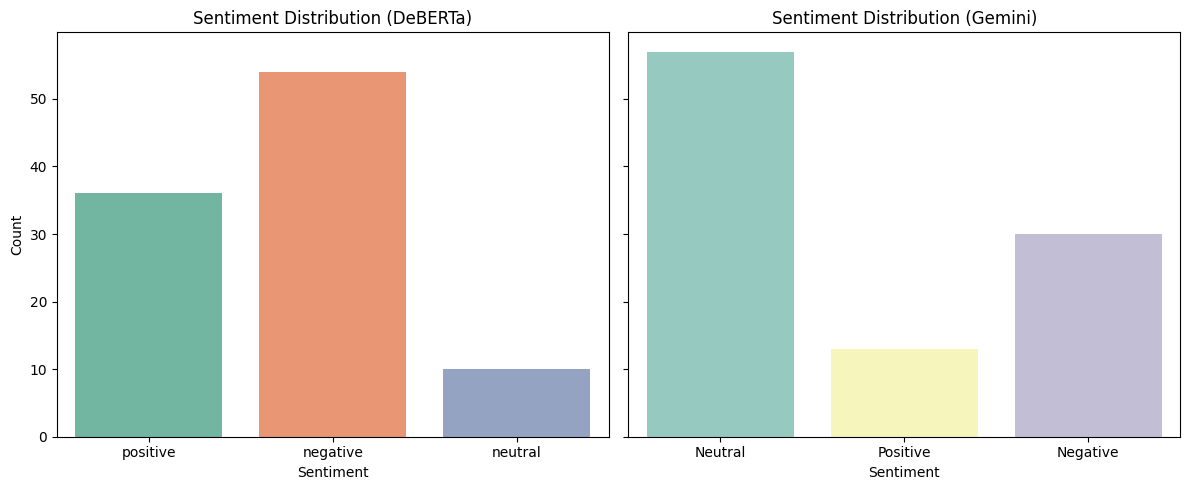

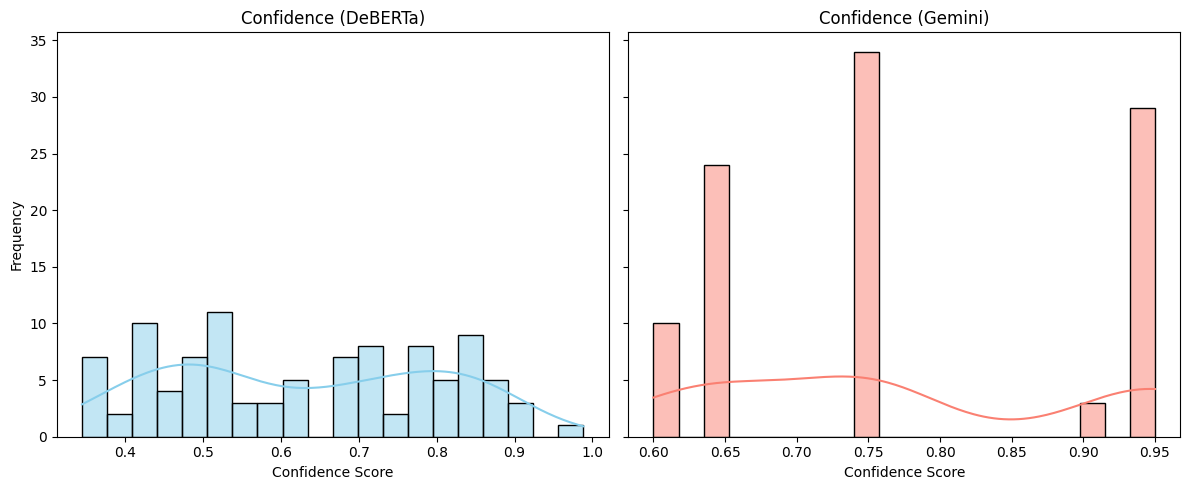

In [32]:
# --- 1. Sentiment Comparison (categorical) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(data=df_predicted, x='deberta_sentiment', palette='Set2', ax=axes[0])
axes[0].set_title('Sentiment Distribution (DeBERTa)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

sns.countplot(data=df_predicted, x='gemini_sentiment', palette='Set3', ax=axes[1])
axes[1].set_title('Sentiment Distribution (Gemini)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


# --- 2. Confidence Comparison (numerical) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(df_predicted['deberta_confidence'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Confidence (DeBERTa)')
axes[0].set_xlabel('Confidence Score')
axes[0].set_ylabel('Frequency')

sns.histplot(df_predicted['gemini_confidence'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Confidence (Gemini)')
axes[1].set_xlabel('Confidence Score')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

EDA for Stance Analysis with Gemini

In [89]:
df_stance=pd.read_csv('../data/reddit_stance_analysis_full.csv')
df_stance.head()

,subreddit,title,text,url,created,keyword,score,created_dt,date,has_emoticon,emoticons_found,label,target,stance,confidence_intensity
0,ukraine,Volunteering in civilian roles,"Hi, I’m an American. When the war broke out, I...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62,2025-07-19 14:54:55,2025-07-19,False,[],Humanitarian concerns and support for refugees,Ukrainian refugees,Supportive,5
1,ukraine,Volunteering in civilian roles,"Hi, I’m an American. When the war broke out, I...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62,2025-07-19 14:54:55,2025-07-19,False,[],Humanitarian concerns and support for refugees,Ukraine,Supportive,4
2,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544,2025-07-11 21:03:10,2025-07-11,True,['<3'],"Prejudice, discrimination, and identity",Putin,Critical,4
3,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544,2025-07-11 21:03:10,2025-07-11,True,['<3'],"Prejudice, discrimination, and identity",refugees from Ukraine,Supportive,5
4,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544,2025-07-11 21:03:10,2025-07-11,True,['<3'],"Prejudice, discrimination, and identity","Ukrainians, Belarusians and other immigrants",Supportive,5


In [90]:
df_stance['target'].value_counts()

target
Israel                      31
Ukraine                     25
Hamas                       24
Palestinians                16
Russia                      15
                            ..
Civilians being targeted     1
Palestinian suffering        1
Critics of Israel            1
Media                        1
refugee camps                1
Name: count, Length: 341, dtype: int64

In [91]:
df_stance['stance'].value_counts()

stance
Critical      340
Supportive    235
Neutral        50
Name: count, dtype: int64

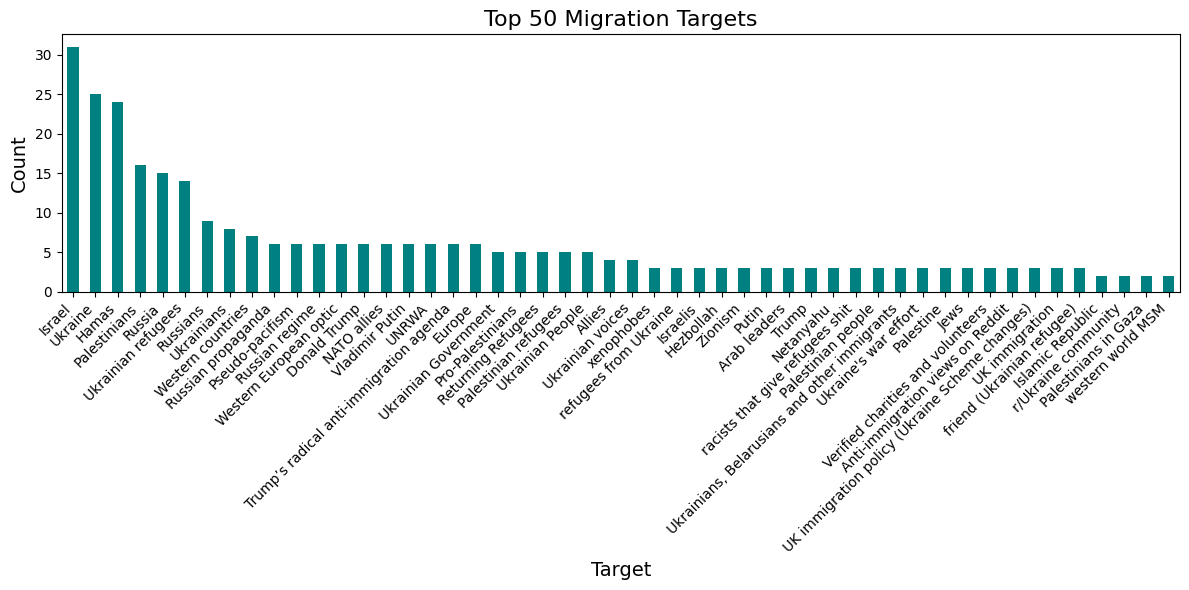

In [107]:
# Distribution of Targets
# Q: Which migration-related entities (e.g. Ukrainian refugees, asylum seekers, migrants, EU) are most discussed?
top_targets = df_stance['target'].value_counts().nlargest(50)

plt.figure(figsize=(12,6))
top_targets.plot(kind='bar', color='teal')
plt.title("Top 50 Migration Targets", fontsize=16)
plt.xlabel("Target", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



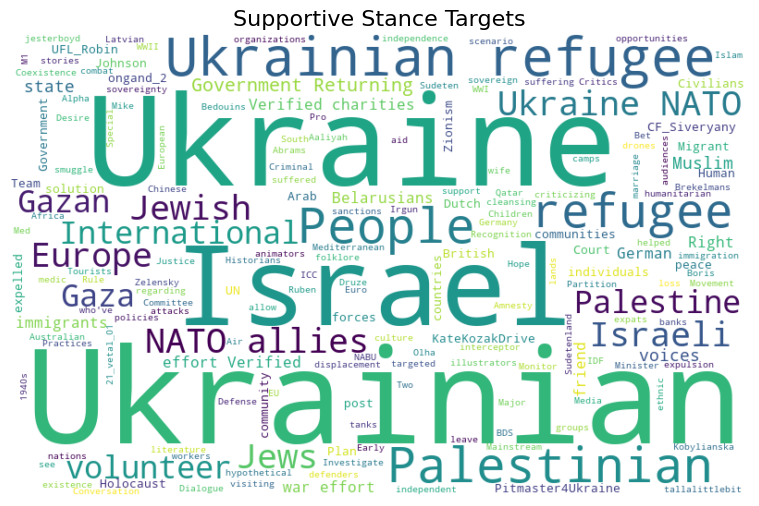

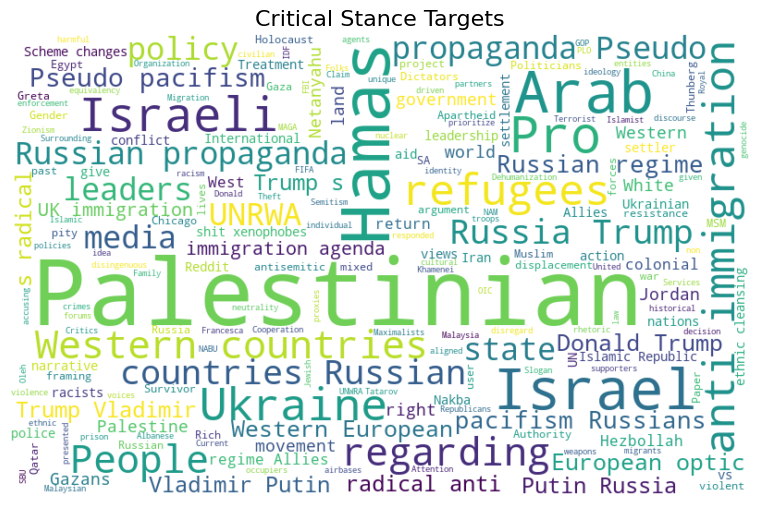

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare texts
supportive_targets = " ".join(df_stance[df_stance['stance']=="Supportive"]['target'].astype(str))
critical_targets   = " ".join(df_stance[df_stance['stance']=="Critical"]['target'].astype(str))

# Generate word clouds
wc_supportive = WordCloud(width=800, height=500, background_color="white").generate(supportive_targets)
wc_critical   = WordCloud(width=800, height=500, background_color="white").generate(critical_targets)

# --- Supportive ---
plt.figure(figsize=(10,6))
plt.imshow(wc_supportive, interpolation="bilinear")
plt.title("Supportive Stance Targets", fontsize=16)
plt.axis("off")
plt.show()

# --- Critical ---
plt.figure(figsize=(10,6))
plt.imshow(wc_critical, interpolation="bilinear")
plt.title("Critical Stance Targets", fontsize=16)
plt.axis("off")
plt.show()

#wc_supportive.to_file("supportive_wordcloud.png")
#wc_critical.to_file("critical_wordcloud.png")


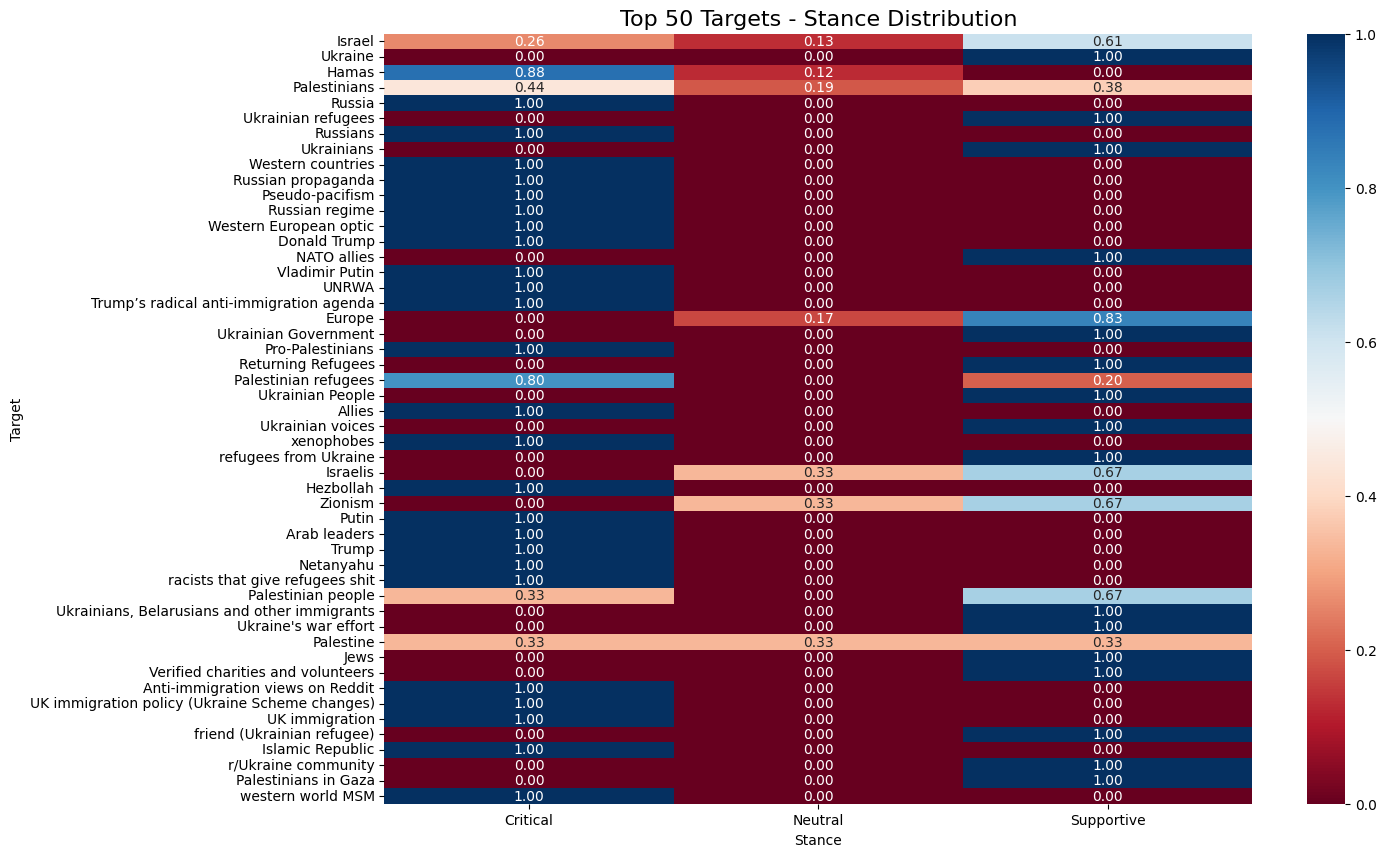

In [110]:
# Target-Stance Heatmap
# Compute proportions per target
heatmap_data = df_stance.groupby(["target","stance"]).size().unstack(fill_value=0)
top_targets = df_stance['target'].value_counts().head(50).index
heatmap_data_top = heatmap_data.loc[top_targets]

plt.figure(figsize=(14,10))  # slightly bigger for readability
sns.heatmap(
    heatmap_data_top.div(heatmap_data_top.sum(axis=1), axis=0),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0.5
)
plt.title("Top 50 Targets - Stance Distribution", fontsize=16)
plt.ylabel("Target")
plt.xlabel("Stance")
plt.show()


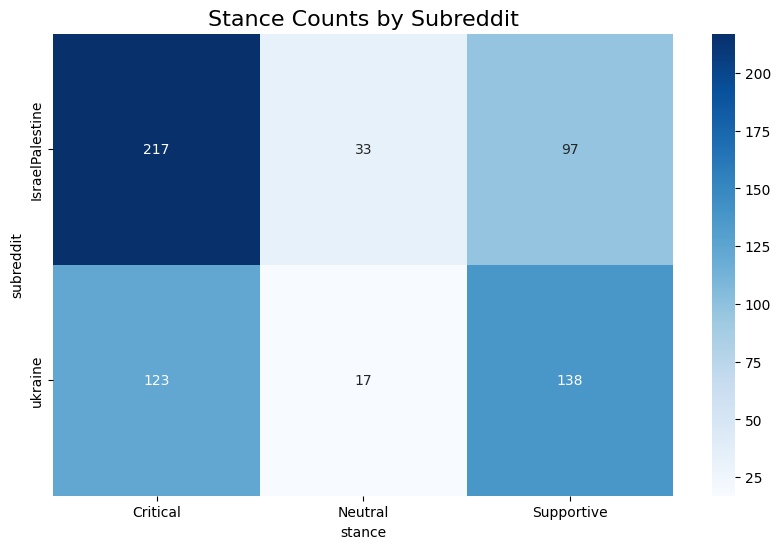

In [95]:
heatmap_data = df_stance.groupby(["subreddit","stance"]).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Stance Counts by Subreddit", fontsize=16)
plt.show()

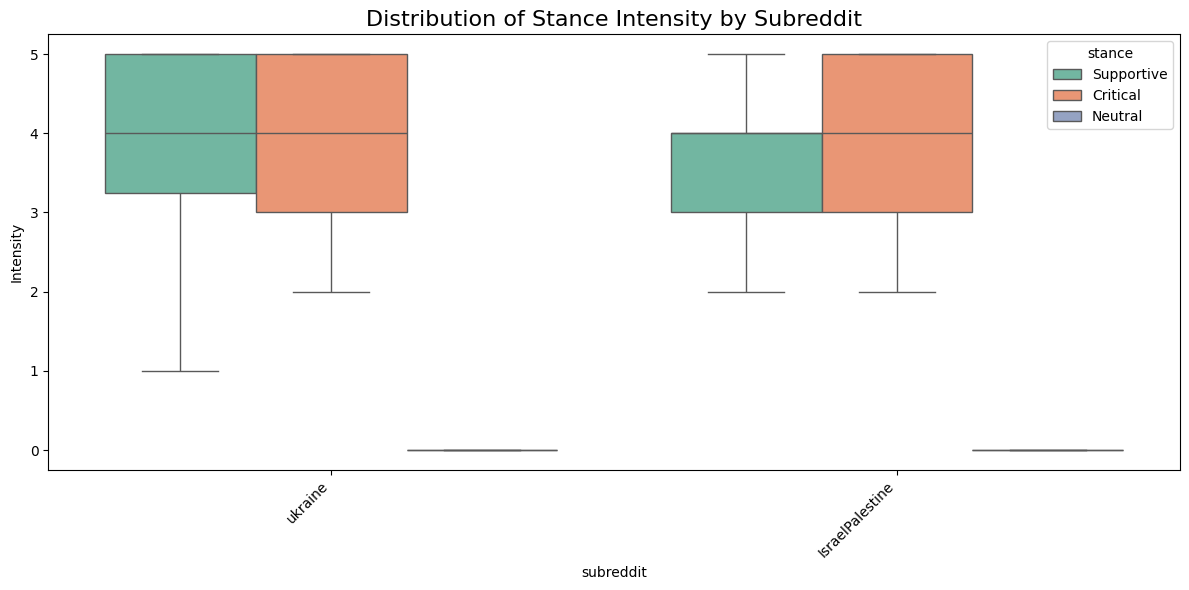

In [96]:
# Q: How strong is the stance in each subreddit?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df_stance, x="subreddit", y="confidence_intensity", hue="stance", palette="Set2")
plt.title("Distribution of Stance Intensity by Subreddit", fontsize=16)
plt.ylabel("Intensity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


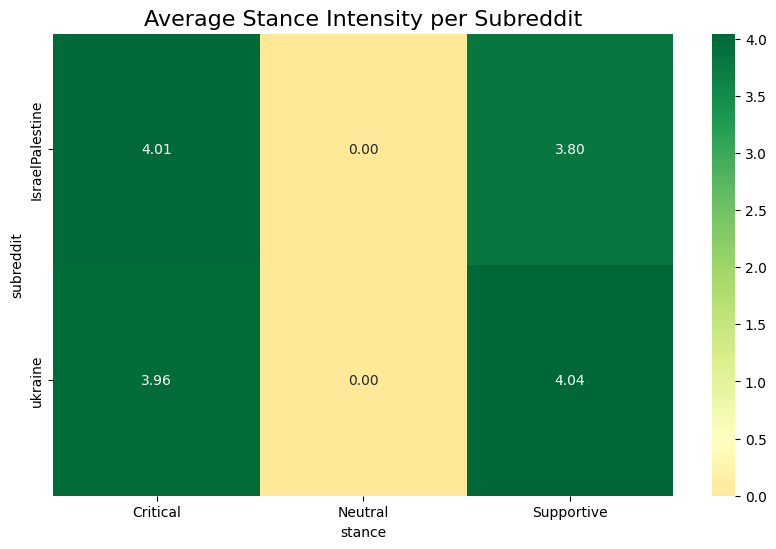

In [97]:
heatmap_data = df_stance.groupby(["subreddit","stance"])["confidence_intensity"].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="RdYlGn", center=0.5, fmt=".2f")
plt.title("Average Stance Intensity per Subreddit", fontsize=16)
plt.show()


In [98]:
import pandas as pd

def polarization_index(group):
    # weight stance proportions by intensity
    weighted_counts = group.groupby("stance")["confidence_intensity"].sum()
    total = weighted_counts.sum()
    p = weighted_counts / total
    return 1 - (p**2).sum()

# compute polarisation per subreddit
polarisation = df_stance.groupby("subreddit").apply(polarization_index).reset_index(name="polarisation_index")


/var/folders/jv/67_frsw54hd0ldzsgf5xrjvw0000gn/T/ipykernel_12549/90342487.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  polarisation = df_stance.groupby("subreddit").apply(polarization_index).reset_index(name="polarisation_index")


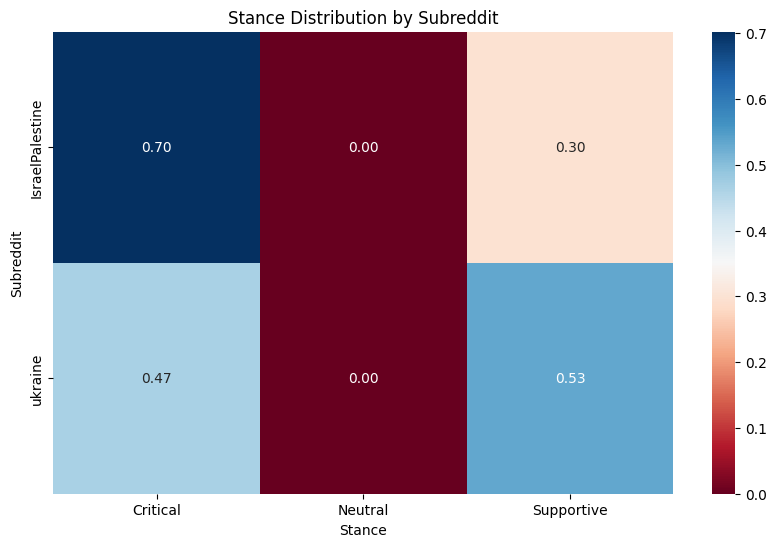

In [99]:
import seaborn as sns

stance_dist = df_stance.groupby(["subreddit","stance"])["confidence_intensity"].sum().reset_index()
stance_pivot = stance_dist.pivot(index="subreddit", columns="stance", values="confidence_intensity").fillna(0)
stance_pivot = stance_pivot.div(stance_pivot.sum(axis=1), axis=0)  # normalise

plt.figure(figsize=(10,6))
sns.heatmap(stance_pivot, cmap="RdBu", annot=True, fmt=".2f")
plt.title("Stance Distribution by Subreddit")
plt.ylabel("Subreddit")
plt.xlabel("Stance")
plt.show()


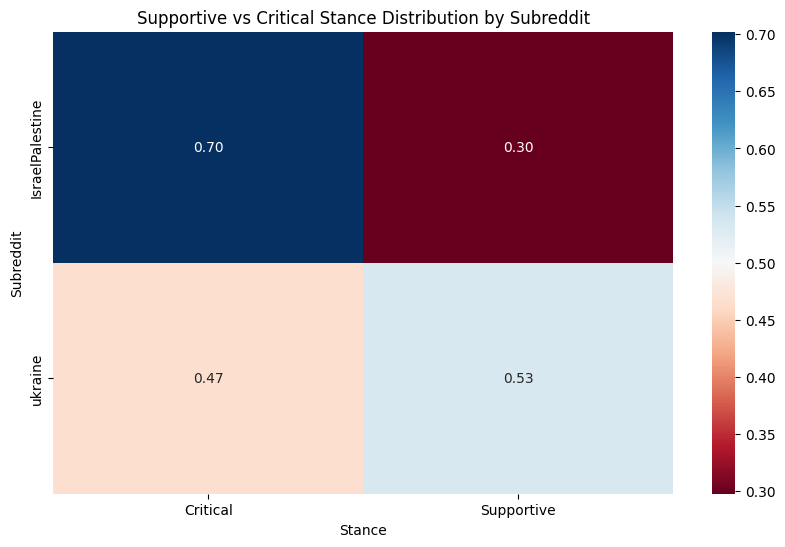

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out Neutral
df_stance_filtered = df_stance[df_stance['stance'].isin(['Supportive', 'Critical'])]

# Aggregate intensity per subreddit and stance
stance_dist = df_stance_filtered.groupby(["subreddit","stance"])["confidence_intensity"].sum().reset_index()

# Pivot for heatmap
stance_pivot = stance_dist.pivot(index="subreddit", columns="stance", values="confidence_intensity").fillna(0)

# Optional: normalize so rows sum to 1 (distribution)
stance_pivot = stance_pivot.div(stance_pivot.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(stance_pivot, cmap="RdBu", annot=True, fmt=".2f", center=0.5)
plt.title("Supportive vs Critical Stance Distribution by Subreddit")
plt.ylabel("Subreddit")
plt.xlabel("Stance")
plt.show()


/var/folders/jv/67_frsw54hd0ldzsgf5xrjvw0000gn/T/ipykernel_12549/3582193921.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  polarization_labels = df_stance.groupby('label').apply(polarization_index).reset_index(name='polarization_index')
/var/folders/jv/67_frsw54hd0ldzsgf5xrjvw0000gn/T/ipykernel_12549/3582193921.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=polarization_labels, x='label', y='polarization_index', palette='coolwarm')


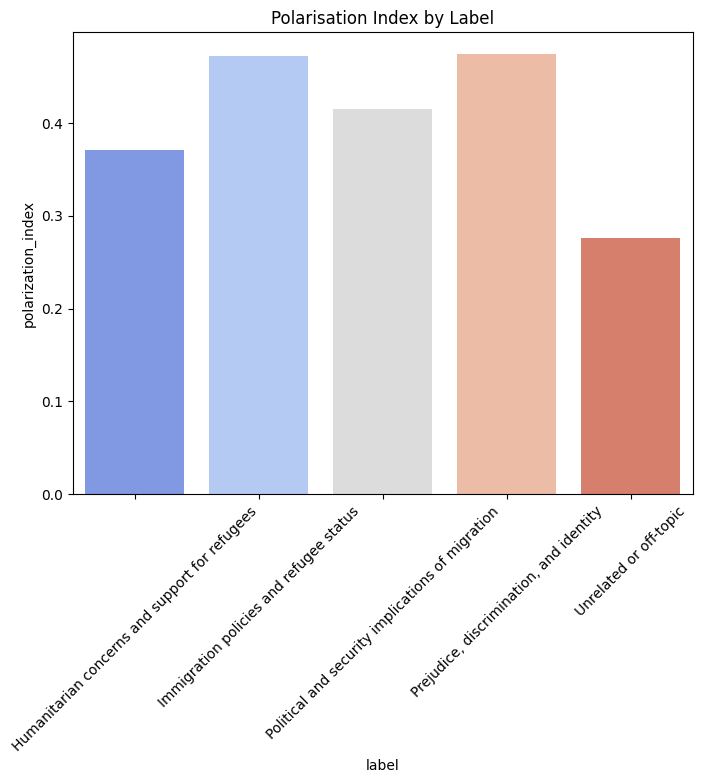

In [101]:
def polarization_index(group):
    weighted_counts = group.groupby('stance')['confidence_intensity'].sum()
    total = weighted_counts.sum()
    p = weighted_counts / total
    return 1 - (p**2).sum()

polarization_labels = df_stance.groupby('label').apply(polarization_index).reset_index(name='polarization_index')

plt.figure(figsize=(8,6))
sns.barplot(data=polarization_labels, x='label', y='polarization_index', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Polarisation Index by Label")
plt.show()

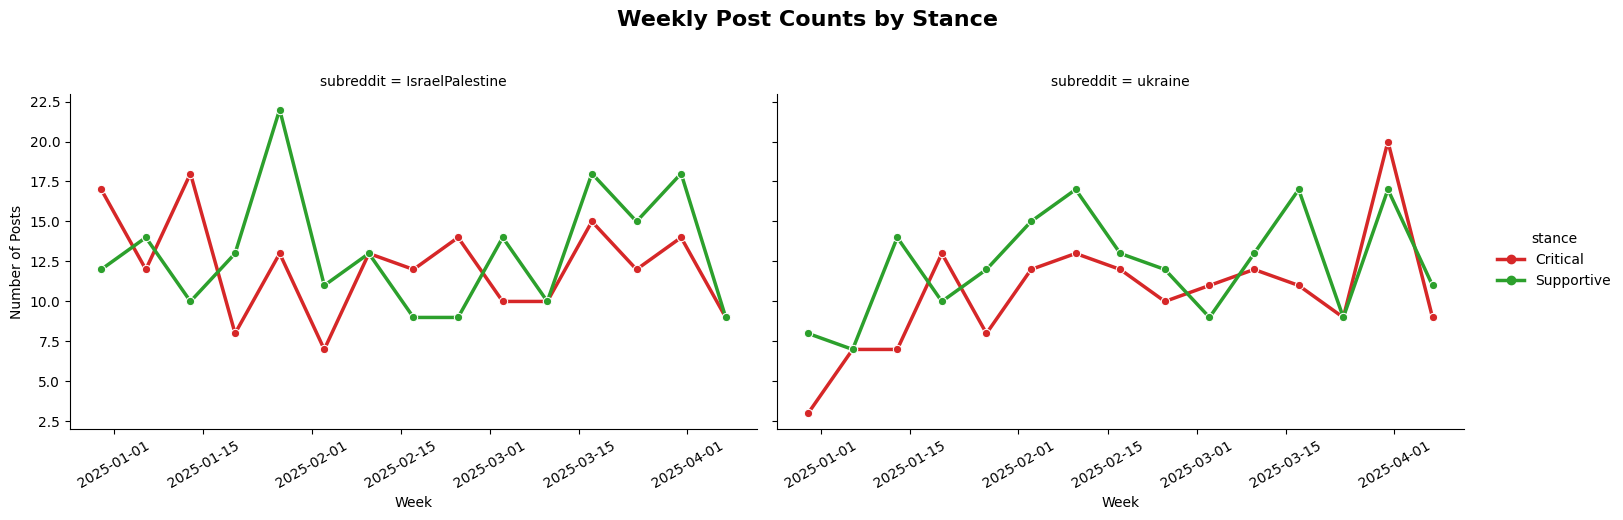

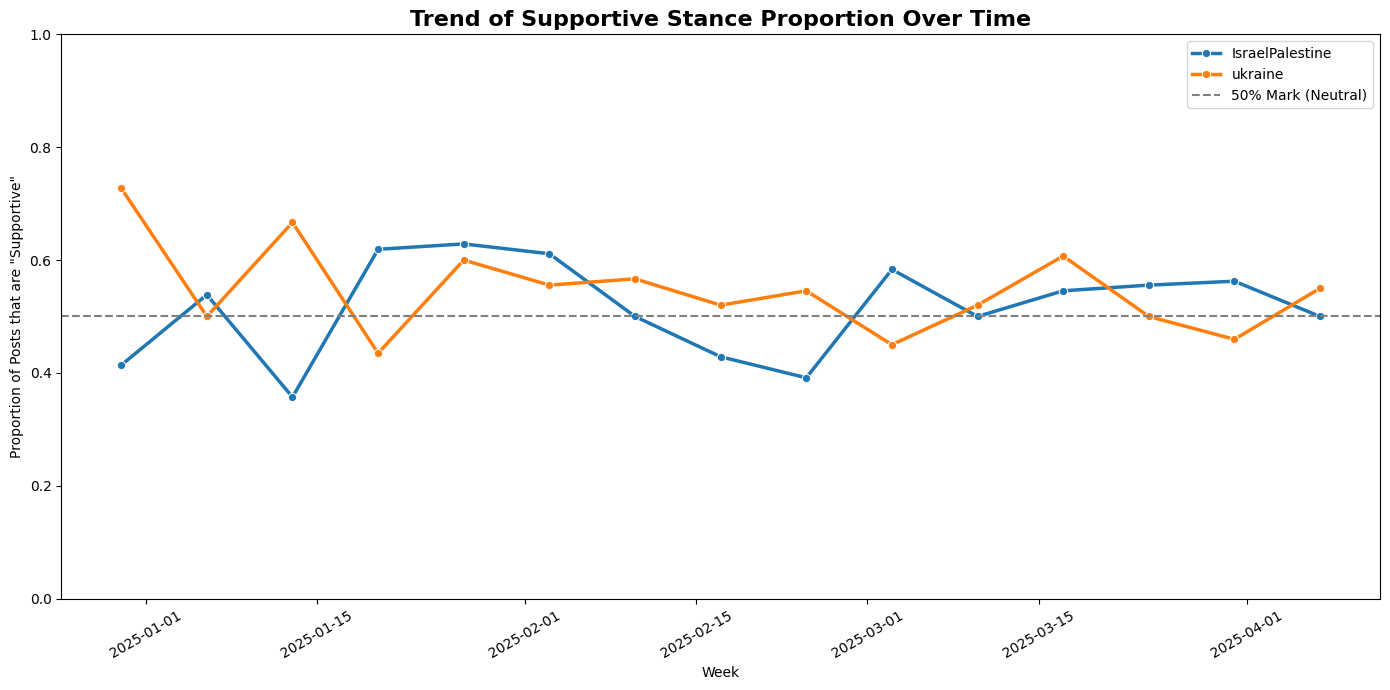

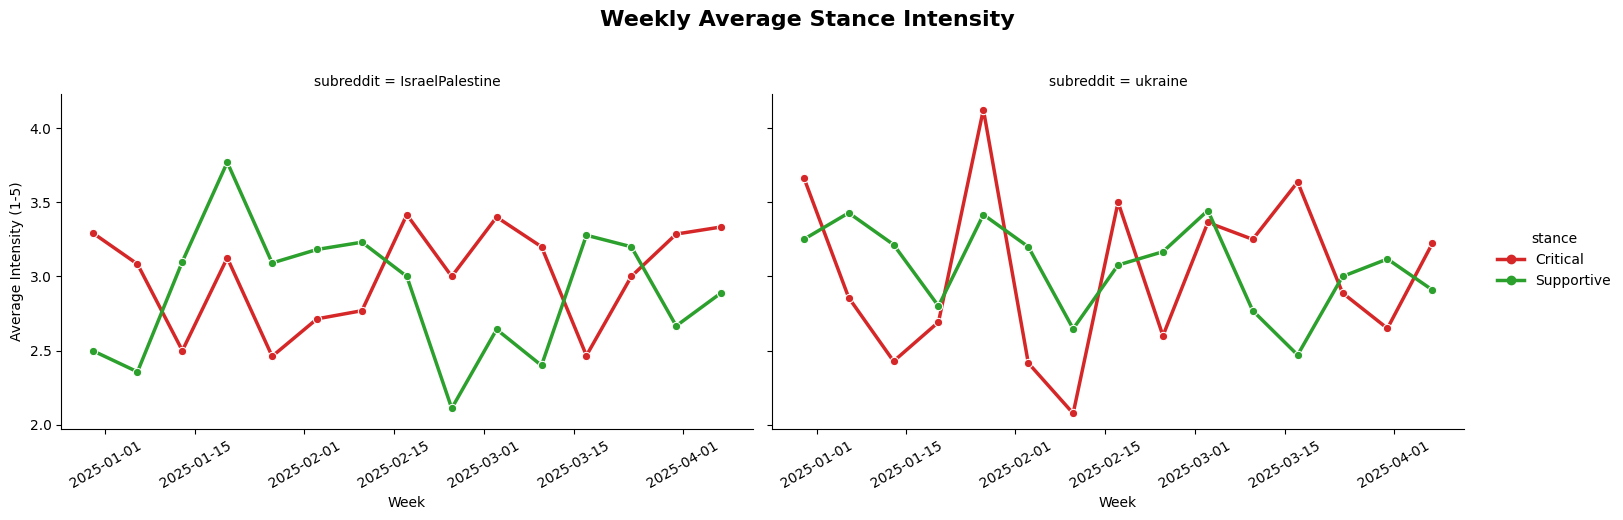

In [103]:
# Stance over time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load and Prepare Your Data ---
# Replace this with your actual data loading.
np.random.seed(42)
dates = pd.to_datetime(pd.date_range('2025-01-01', periods=100, freq='D'))
data = []
for date in dates:
    for sub in ['ukraine', 'IsraelPalestine']:
        for _ in range(np.random.randint(1, 10)):
            stance = np.random.choice(['Supportive', 'Critical', 'Neutral'])
            intensity = 0 if stance == 'Neutral' else np.random.randint(1, 6)
            data.append([date, sub, stance, intensity])
df_stance = pd.DataFrame(data, columns=['date', 'subreddit', 'stance', 'confidence_intensity'])
# --- End of Sample Data Creation ---


# Filter out 'Neutral' stance for cleaner trend lines
df_analysis = df_stance[df_stance['stance'].isin(['Supportive', 'Critical'])].copy()

# Resample data by week for smoother plotting
df_analysis['week'] = df_analysis['date'].dt.to_period('W').apply(lambda r: r.start_time)


# --- 2. Improved Plot 1: Post Count Trends Side-by-Side ---
# Group data to get weekly counts
posts_per_week = df_analysis.groupby(['week', 'subreddit', 'stance']).size().reset_index(name='count')

# Use seaborn's relplot to create facets for each subreddit
g = sns.relplot(
    data=posts_per_week,
    x='week',
    y='count',
    hue='stance',
    col='subreddit',  # This creates the side-by-side plots
    kind='line',
    height=5,
    aspect=1.5,
    palette={'Supportive': '#2ca02c', 'Critical': '#d62728'},
    marker='o',
    lw=2.5
)
g.fig.suptitle('Weekly Post Counts by Stance', y=1.03, fontsize=16, weight='bold')
g.set_axis_labels("Week", "Number of Posts")
g.set_xticklabels(rotation=30)
g.tight_layout()
plt.show()


# --- 3. Improved Plot 2: Direct Comparison of Stance Proportion ---
# Calculate the proportion of 'Supportive' posts per week for each subreddit
weekly_props = df_analysis.groupby(['week', 'subreddit'])['stance'].value_counts(normalize=True).unstack().fillna(0)
weekly_props = weekly_props.reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=weekly_props,
    x='week',
    y='Supportive',
    hue='subreddit',
    lw=2.5,
    marker='o'
)
# Add a horizontal line at 50% for a clear baseline of sentiment
plt.axhline(0.5, ls='--', color='gray', label='50% Mark (Neutral)')
plt.title('Trend of Supportive Stance Proportion Over Time', fontsize=16, weight='bold')
plt.ylabel('Proportion of Posts that are "Supportive"')
plt.xlabel('Week')
plt.ylim(0, 1) # Proportions are between 0 and 1
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()


# --- 4. Improved Plot 3: Stance Intensity Trends Side-by-Side ---
# Group data to get average weekly intensity
avg_intensity_week = df_analysis.groupby(['week', 'subreddit', 'stance'])['confidence_intensity'].mean().reset_index()

# Use relplot again for a clear, faceted view
g_intensity = sns.relplot(
    data=avg_intensity_week,
    x='week',
    y='confidence_intensity',
    hue='stance',
    col='subreddit',
    kind='line',
    height=5,
    aspect=1.5,
    palette={'Supportive': '#2ca02c', 'Critical': '#d62728'},
    marker='o',
    lw=2.5
)
g_intensity.fig.suptitle('Weekly Average Stance Intensity', y=1.03, fontsize=16, weight='bold')
g_intensity.set_axis_labels("Week", "Average Intensity (1-5)")
g_intensity.set_xticklabels(rotation=30)
g_intensity.tight_layout()
plt.show()

✅ Successfully loaded full dataset.
Data prepared. Starting visualizations...
Saved score_by_stance.png
Saved intensity_vs_score.png


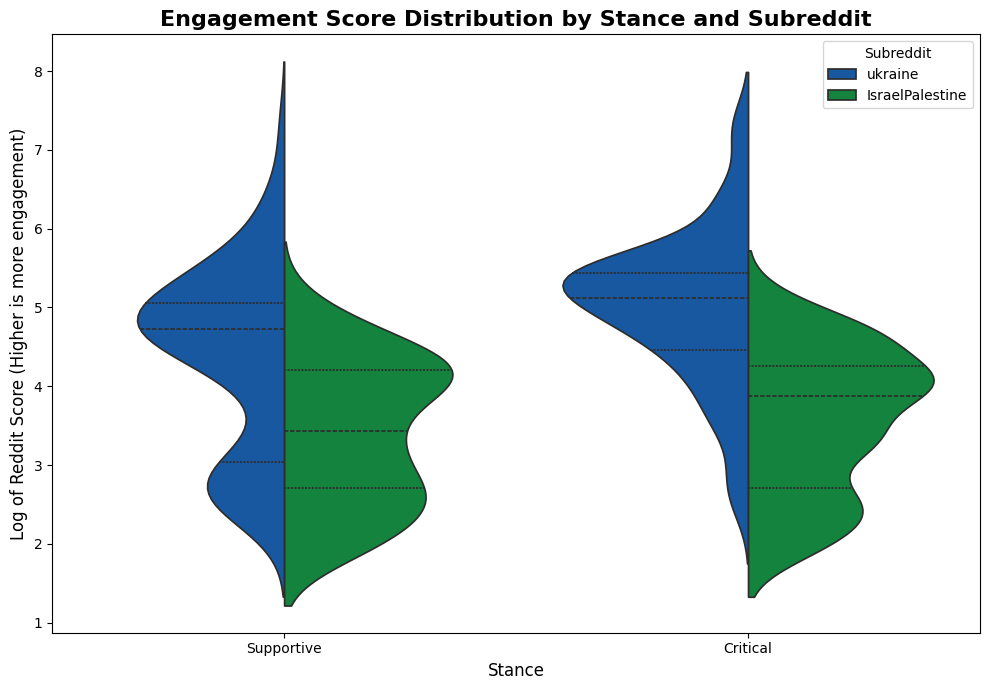

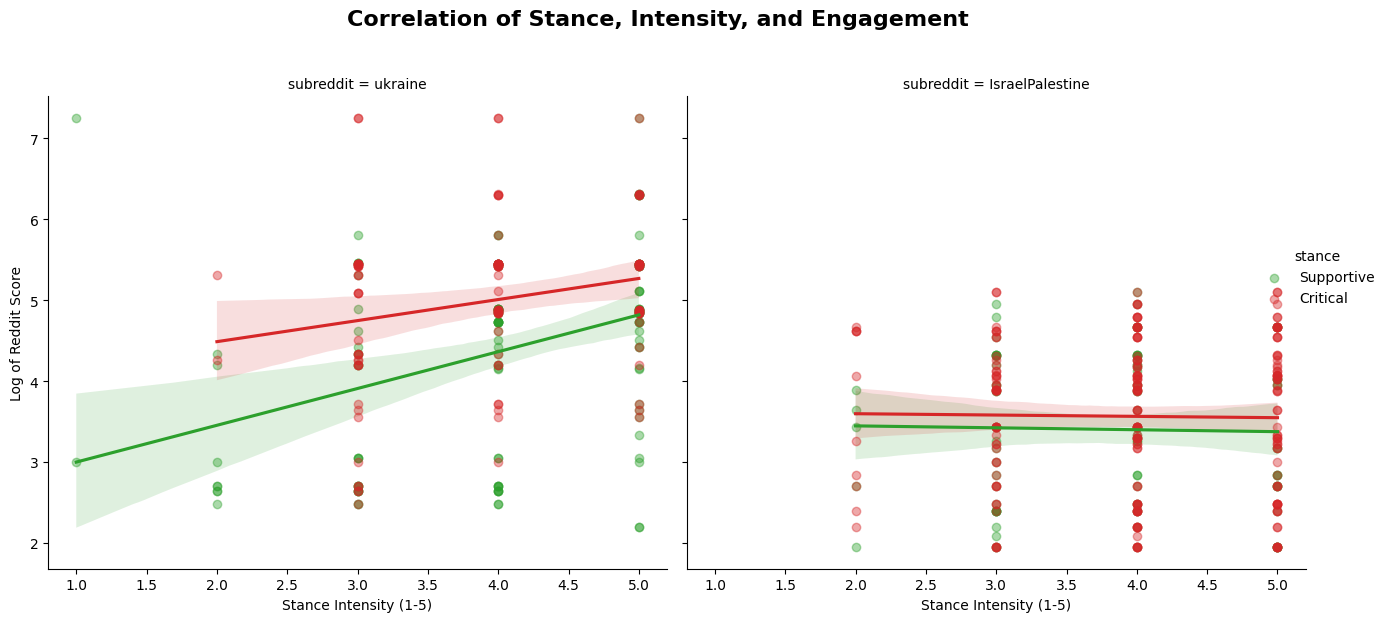

In [114]:
# Engagement analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load Your Full, Real Dataset ---
# This is the crucial first step. It ensures all columns, including 'score', are loaded.
try:
    df_stance = pd.read_csv('../data/reddit_stance_analysis_full.csv')
    print("✅ Successfully loaded full dataset.")
except FileNotFoundError:
    print("🔥 ERROR: The file '../data/reddit_stance_analysis_full.csv' was not found.")
    print("Please make sure you have run the full analysis script to generate this file.")
    # Stop the script if the file doesn't exist.
    exit()

# --- 2. Data Preparation ---
# Filter out neutral stances if they exist
df_analysis = df_stance[df_stance['stance'].isin(['Supportive', 'Critical'])].copy()

# Reddit scores are often heavily skewed. Applying a log transform helps in visualization.
df_analysis['log_score'] = np.log(df_analysis['score'] + 1)

print("Data prepared. Starting visualizations...")

# --- 3. Visualization 1: Score Distribution by Stance ---
plt.figure(figsize=(10, 7))
sns.violinplot(
    data=df_analysis,
    x='stance',
    y='log_score',
    hue='subreddit',
    split=True,
    palette={'ukraine': '#0057b7', 'IsraelPalestine': '#009639'},
    inner='quartile'
)
plt.title('Engagement Score Distribution by Stance and Subreddit', fontsize=16, weight='bold')
plt.xlabel('Stance', fontsize=12)
plt.ylabel('Log of Reddit Score (Higher is more engagement)', fontsize=12)
plt.legend(title='Subreddit', loc='upper right')
plt.tight_layout()
plt.savefig('score_by_stance.png')
print("Saved score_by_stance.png")


# --- 4. Visualization 2: Correlation of Intensity and Score ---
g = sns.lmplot(
    data=df_analysis,
    x='confidence_intensity',
    y='log_score',
    hue='stance',
    col='subreddit',
    height=6,
    aspect=1,
    palette={'Supportive': '#2ca02c', 'Critical': '#d62728'},
    scatter_kws={'alpha':0.4}
)
# The bbox_to_anchor coordinates move it slightly right (1.05) and up (0.65).
sns.move_legend(g, "upper right", bbox_to_anchor=(1.05, 0.65))

g.fig.suptitle('Correlation of Stance, Intensity, and Engagement', y=1.03, fontsize=16, weight='bold')
g.set_axis_labels("Stance Intensity (1-5)", "Log of Reddit Score")
plt.tight_layout()
plt.savefig('intensity_vs_score.png')
print("Saved intensity_vs_score.png")

Key Interpretations

For r/ukraine (Left Panel):

There appears to be a positive correlation between intensity and engagement.

    Upward Sloping Lines: Both the green ("Supportive") and red ("Critical") lines are clearly sloping upwards.

    Meaning: This suggests that within the r/ukraine subreddit, posts with stronger and more intense language—whether supportive or critical—tend to receive higher scores and more engagement from the community. More passionate rhetoric is rewarded.

For r/IsraelPalestine (Right Panel):

There is little to no correlation between intensity and engagement.

    Flat Lines: Both the green and red lines are nearly horizontal.

    Meaning: This indicates that the intensity of a post's language has no clear effect on its score in the r/IsraelPalestine subreddit. A mildly critical post (intensity 1) is just as likely to get a high or low score as a very strongly worded critical post (intensity 5). Engagement in this community seems to be driven by factors other than rhetorical intensity.

Overall Conclusion

The two communities reward different types of content. The r/ukraine community appears to value and engage more with passionate, high-intensity posts, while engagement in the r/IsraelPalestine community is independent of the post's emotional intensity.